---


The structure of the dataset files that are downloaded looks like this (You will notice that the test directory has no subdirectories and the images are not labeled):
```
cats_and_dogs
|__ train:
    |______ cats: [cat.0.jpg, cat.1.jpg ...]
    |______ dogs: [dog.0.jpg, dog.1.jpg ...]
|__ validation:
    |______ cats: [cat.2000.jpg, cat.2001.jpg ...]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg ...]
|__ test: [1.jpg, 2.jpg ...]
```


In [4]:
import os

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Criar pasta se necessário

In [13]:
!mkdir ../datasets/cats_vs_dogs

### Obter e extrair arquivos

In [16]:
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip -O ../Datasets/cats_vs_dogs.zip

--2020-10-20 10:56:13--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘../Datasets/cats_vs_dogs.zip’

../Datasets/cats_vs     [                <=> ]  67,43M  6,65MB/s    in 10s     

2020-10-20 10:56:23 (6,54 MB/s) - ‘../Datasets/cats_vs_dogs.zip’ saved [70702765]



In [20]:
!unzip ../Datasets/cats_vs_dogs.zip

tar: Refusing to read archive contents from terminal (missing -f option?)
tar: Error is not recoverable: exiting now


In [9]:
URL = 'https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip'

path_to_zip = tf.keras.utils.get_file(fname='cats_and_dogs.zip', origin=URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

Exception: URL fetch failure on https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip: 403 -- Forbidden

In [ ]:
# Variables for pre-processing and training.
batch_size = 128
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [1]:
!mkdir $test_dir/test_imgs

mkdir: cannot create directory ‘/test_imgs’: Permission denied


In [ ]:
!mv $test_dir/* $test_dir/test_imgs

mv: cannot move '/root/.keras/datasets/cats_and_dogs/test/test_imgs' to a subdirectory of itself, '/root/.keras/datasets/cats_and_dogs/test/test_imgs/test_imgs'


In [ ]:
train_image_generator = ImageDataGenerator(rescale=1/255)
validation_image_generator = ImageDataGenerator(rescale=1/255)
test_image_generator = ImageDataGenerator(rescale=1/255)

train_data_gen = train_image_generator.flow_from_directory(train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode="binary", batch_size=batch_size, color_mode="rgb", seed=42)
val_data_gen = validation_image_generator.flow_from_directory(validation_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode="binary", batch_size=batch_size, color_mode="rgb", seed=42)
test_data_gen = test_image_generator.flow_from_directory(test_dir, target_size=(IMG_HEIGHT, IMG_WIDTH), shuffle=False, color_mode="rgb", class_mode=None, classes=None)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


The `plotImages` function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the `train_data_gen` variable correctly, then running the cell below will plot five random training images.

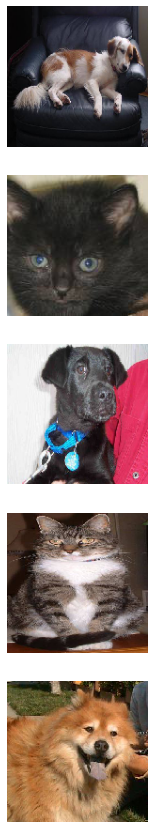

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
train_image_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, width_shift_range=0.3, height_shift_range=0.3, rotation_range=90, shear_range=0.1, rescale=1/255)
validation_image_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90, rescale=1/255)

Found 2000 images belonging to 2 classes.


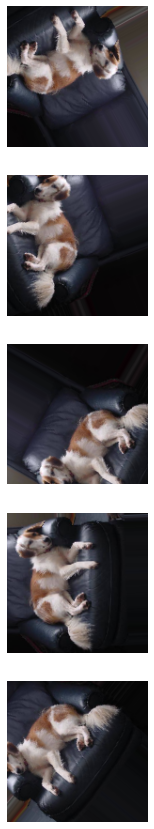

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(train_dir, 
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode="binary",
                                                           batch_size=batch_size,
                                                           color_mode="rgb",
                                                           seed=42)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [5]:
# Usando modelos treinados

In [ ]:
conv_layers = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

conv_layers.trainable=False

conv_layers.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
________________

In [ ]:
new_model = Sequential()

new_model.add(conv_layers)
new_model.add(Flatten())
new_model.add(Dense(1, activation="sigmoid", kernel_regularizer="l2"))

new_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_7 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 32001     
Total params: 2,289,985
Trainable params: 32,001
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
new_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = new_model.fit(train_data_gen, batch_size=total_train/batch_size, epochs=epochs, validation_data=val_data_gen, validation_steps=total_val/batch_size)

Epoch 1/5
16/16 [==============================] - 53s 3s/step - loss: 1.0742 - accuracy: 0.8350 - val_loss: 0.3237 - val_accuracy: 0.9480
Epoch 2/5
16/16 [==============================] - 52s 3s/step - loss: 0.2583 - accuracy: 0.9615 - val_loss: 0.3145 - val_accuracy: 0.9490
Epoch 3/5
16/16 [==============================] - 52s 3s/step - loss: 0.1350 - accuracy: 0.9760 - val_loss: 0.3243 - val_accuracy: 0.9440
Epoch 4/5
16/16 [==============================] - 52s 3s/step - loss: 0.0677 - accuracy: 0.9890 - val_loss: 0.2586 - val_accuracy: 0.9540
Epoch 5/5
16/16 [==============================] - 54s 3s/step - loss: 0.0465 - accuracy: 0.9950 - val_loss: 0.2546 - val_accuracy: 0.9520


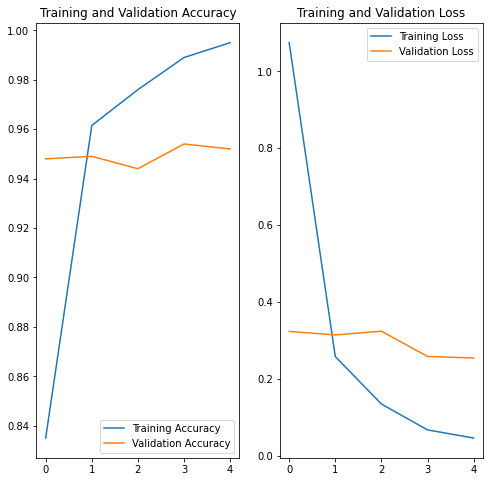

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

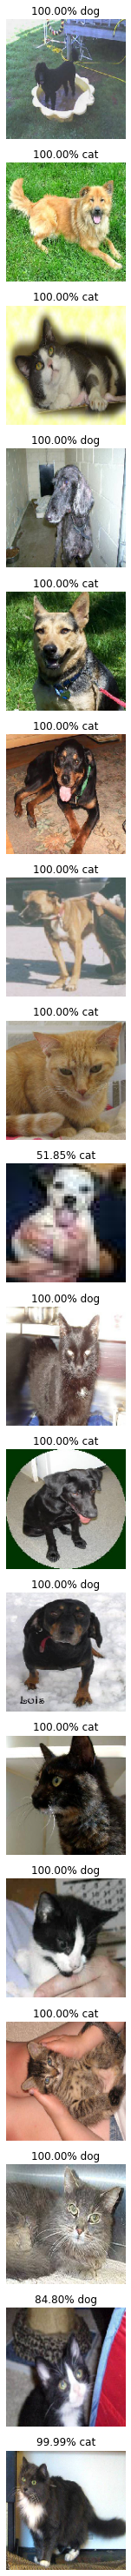

In [ ]:
probabilities = new_model.predict(test_data_gen)

sample_test_images = next(test_data_gen)

plotImages(sample_test_images, probabilities=probabilities)